# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнила студентка гр. 9304 Паутова Юлия, вариант 35.

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

Существует несколько методов быстрого возведения в степень - методов, предназначенных для возведения числа $x$ в натуральную степень $n$ за меньшее число умножений, чем это требуется в определении степени. В данной работе будут рассмотрны 2 из них: бинарный метод и метод множителей.

**Бинарный метод:**

Показатель степени представляется в двоичном виде; отбрасывается больший разряд. Если в разряде стоит 1, то текущий результат удваивается и умножается на х. Если в разряде стоит 0, то текущий результат просто удваивается.  
Количество операций можно вычислить по формуле: $\nu(n) + \lambda(n) - 1$, где $\nu(n)$ - вес Хэмминга - количество не нулевых цифр в двоичной записи числа $n$, $\lambda(n) = \left\lfloor lbn \right\rfloor$.

**Метод множителей:**

Показатель степени представляется как произведение двух чисел $n = i\cdot j$, где $i$ - наименьший простой множитель числа n, а $j > 1$. Сначала число возводится в степень $i$, затем результат возводится в степень $j$. Если показатель степени $n$ простое число, то на множители $i$ и $j$ раскладывается число $n-1$, почле чего число возводится в эту степень, а затем домножается само на себя.

*Аддитивная цепочка для числа $n \in \mathbb{N}$* $-$ это последовательность натуральных чисел $(1=a_0, a_1, ... , a_m=n)$, начинающаяся с единицы, в которой каждый последующий элемент является суммой каких-то двух предшествующих элементов:
- $a_{0}=1$;
- для любого $0 < i \leq m$, $a_{i}=a_{j}+a_{k}$, где $k \leq j < i$.

$l(n)$ - минимальная длина аддитивной цепочки. Если $n \leq 1000$, то справедлива рекурентная формула: $l(n) = min\{ l(n-1)+1, l_n\} - \delta_n$, где $l_p = \begin{cases} \infty \text{, если p - простое число}  \\ l(q) + l(\frac{p}{q}) \text{, если q - минимальный простой делитель числа p} \end{cases}$, $\delta_n\in\{0, 1\}$

Если $a_i < a_{i+1}$, то равенство $a_i = a_j+a_k$, $i = 1..m$, $0\leqslant k\leqslant j < i$ называется шагом аддитивной цепочки. Типы шагов:
- Удвоение, если $j = k = i-1$: $a_i = 2 * a_{i-1}$
- Звёздный, если $j = i-1$, $k \in [0,i-1]$
- Малый шаг, если $\lambda(a_i) = \lambda(a_{i-1})$

**Теорема Брауэра:**  
При нектором $k < lb(lbn)$ справедливо: $l(n) < (1+k^{-1})\cdot\lceil lbn\rceil+2^{k-1}-k+2$.

*Следствия:*  
Если $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, тогда:
1. $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$.
2. Наилучшая верхняя оценка для l(n) имеет вид: $\lambda(n)\bigg(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2}\bigg)$

**Алгоритм Брауэра.**  
Данный алгоритм является алгоритмом вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k \geq 2$. Цепочки, вычисленные алгоритмом Брауэра, называются Брауэрскими и задаются рекурентной формулой:
$$
B_k(n) =\begin{cases}1, 2, 3, ..., 2^k-1\text{, } n<2^k \\ B_k(q), 2q, 4q, 8q, ..., 2^kq, n,\text{ } n \geqslant 2^k\ \text{и } q = \lfloor\frac{n}{2^k}\rfloor \end{cases}
$$

*Звёздная цепочка* $-$ это цепочка, которая содержит в себе только звёздные шаги. $a_i = a_{i-1} + a_k\text{, где } 0\leqslant k\leqslant i-1 $. $l^*(n)$ - длина звёздной цепочки. $l^*(n)\geqslant l(n)$

**Гипотеза Шольца-Брауэра:**
$$ l^*(2^n-1)\leqslant l^*(n)+n-1 $$

Пусть ${\{a_i\}}_{i=1}^m \text{ - звёздная цепочка, } l^*(n) = m, a_1 = 1$, тогда можно задать *вектор индексов* ${\{r_i\}}_{i=1}^{m-1}\text{: } r_i = \{x: 1\leqslant x\leqslant i\}$.  
Шаг звёздной цепочки можно переписать с помощью вектора индексов: $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

*Полная упорядоченность векторов:*  
Будем считать, что $r = {\{r_i\}}_{i=1}^{m-1}$, больше чем $\tilde r = {\{\tilde r_i\}}_{i=1}^{m-1}$, если $r_1 = \tilde r_1$, $r_2 = \tilde r_2$, $r_3 = \tilde r_3$, $r_{i-1} = \tilde r_{i-1}$, ..., $r_i > \tilde r_i$.

Вектор индексов можно разбить на два вектора: $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ меняющийся вектор. Можно заметить, что:
- наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\}, \ a_{max} = a_{q+1}\cdot2^{m-q}$;
- наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\}, \ a_{min} = a_{q+1}+m-q$.

На разбиение вектора индексов строится следующий алгоритм поиска минимальной звездной цепочки для заданного числа $n$.

**Алгоритм дробления вектора индексов:**

1. Векток индексов разбивается на фиксированный и меняющийся. 
2. Строится звездная цепочка для всего вектора индексов и вычисляется $a_{min}\text{ и }a_{max}$. Если:
    - $a_m = n$, то решение найдено;
    - $n\notin[a_{min}, a_{max}]$, то осуществляется переход к следующему набору фиксированному вектору;
    - $n\in[a_{min}, a_{max}]$, то перебор всех меняющихся векторов.
3. Если для заданной длины не нашлось аддитивной цепочки, то длина цепочки увеличивается (длина аддитивной цепочки $m\in[ \underline{l}(n),\overline{l}(n)],\text{ где } \underline{l}(n)=\lceil log_2 n \rceil, \overline{l}(n)=\lambda(n)+\nu(n)-1$).

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием систем компьютерной алгебры SageMath, провести анализ алгоритмнов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.
6. *Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность*.

## Выполнение работы
**1. Решение задач вычисления степеней бинарным методом и методом множителей.**

Применим бинарный метод и метод множителей для $x^{72}$, $x^{67}$, $x^{127}$

*Бинарный метод для $x^{72}$:*

Представим показатель степени в двоичном виде: $72_{10}$ = $(1001000)_2$, отбрасываем первую единицу. Если в разряде стоит 1, то текущий результат удваивается и умножается на х. Если в разряде стоит 0, то текущий результат просто удваивается.
$$
x*x = x^2 \\
x^2*x^2 = x^4 \\
x^4*x^4 = x^8 \\
x^8*x = x^9 \\
x^9*x^9 = x^{18} \\
x^{18}*x^{18} = x^{36} \\
x^{36}*x^{36} = x^{72}
$$

*Метод множителей для $x^{72}$:*

Разбиваем показатель степени на простые множители: $x^{72}$ = $(x^2)^{36}$ = $((x^2)^2)^{18}$ = $(((x^2)^2)^2)^9$ = $((((x^2)^2)^2)^3)^3$.
$$
x*x = x^2 \\
x^2*x^2 = x^4 \\
x^4*x^4 = x^8 = y \\
y*y = y^2 \\
y^2*y = y^3 = z \\
z*z = z^2 \\
z^2*z = z^3 \\
z^3 = (y^3)^3 = ((x^8)^3)^3 = x^{72}
$$

В бинарном методе и методе множителей одинаковое количесвто операций - 7.

*Бинарный метод для $x^{67}$:*

Представим показатель степени в двоичном виде: $67_{10}$ = $(1000011)_2$.
$$
x*x = x^2 \\
x^2*x^2 = x^4 \\
x^4*x^4 = x^8 \\
x^8*x^8 = x^{16} \\
x^{16}*x^{16} = x^{32} \\
x^{32}*x = x^{33} \\
x^{33}*x^{33} = x^{66} \\
x^{16}*x = x^{67}
$$

*Метод множителей для $x^{67}$:*

Разбиваем показатель степени на простые множители: $x^{67}$ = x\*$(x^2)^{33}$ = x\*$((x^2)^3)^{11}$.
$$
x*x = x^2 = y \\
y*y = y^2 \\
y^2*y = y^3 = z \\
z*z = z^2 \\
z^2*z^2 = z^4 \\
z^4*z = z^5 \\
z^5*z^5 = z^{10} \\
z^{10}*z = z^{11} \\
x*z^{11} = x*(y^3)^{11} = x*((x^2)^3)^{11} = x^{67}
$$

В бинарном методе 8 операций, в методе множителей - 9.

*Бинарный метод для $x^{127}$:*

Представим показатель степени в двоичном виде: $127_{10}$ = $(1111111)_2$, отбрасываем первую единицу.
$$
x*x = x^2 \\
x^2*x = x^3 \\
x^3*x^3 = x^6 \\
x^6*x = x^7 \\
x^7*x^7 = x^{14} \\
x^{14}*x = x^{15} \\
x^{15}*x^{15} = x^{30} \\
x^{30}*x = x^{31} \\
x^{31}*x^{31} = x^{62} \\
x^{62}*x = x^{63} \\
x^{63}*x^{63} = x^{126} \\
x^{126}*x = x^{127}
$$

*Метод множителей для $x^{127}$:*

Разбиваем показатель степени на простые множители: $x^{127}$ = $x(x)^{126}$ = $x(x^2)^{63}$ = $x^3(x^2)^{62} = x^3((x^2)^2)^{31} = x^7((x^2)^2)^{30} = x(x^2)^3(((x^2)^2)^2)^{15} = x(x^2)^3((((x^2)^2)^2)^3)^5$.
$$
x*x = x^2 = y \\
y*y = y^2 \\
y^2*y = y^3 = z \\
z*z = z^2 \\
z^2*z^2 = z^4 = t\\
t*t = t^2 \\
t^2*t^2 = t^4 \\
t^4*t = t^5 \\
t^5*z = y^3(z^4)^5 = (x^2)^3((y^3)^4)^5 = (x^2)^3(((x^2)^3)^4)^5 = x^{126}\\
x^{126}*x = x^{127}
$$

В бинарном методе 12 операций, в методе множителей - 10.

**Результаты возведения в степень:**

|n|Число операций БМ|Число операций ММ|
|:-:|:-:|:-:|
|72|7|7|
|67|8|9|
|127|12|10|

**Вывод:**

*При степенях $n = 2^k-1, k \in N$ метод множителей оказывается эффеткивнее бинарного метода. При степенях $n = 2^k+1, k = 5,6,...$ бинарный метод оказывается эффективнее. В остальных случаях оба метода выполняются за одно и то же число операций или метод множителей выполняется быстрее, но не значительно.*

**Реализация алгоритма Брауэра.**

Данный алгоритм позволяет вычислять приближённые аддитивные цепочеки для различных чисел при варьировании параметра k. Ниже представлена реализация алгоритма Брауэра.

In [6]:
def case_1(n, k):
    Bk = []
    for i in range(1, 2**k):
        Bk.append(i)
    return Bk

def case_2(q, k):
    Bk = []
    for i in range(1, k+1):
        Bk.append(q*(2**i))
    return Bk

def Brauer_algorithm(n, k):
    if (n < 2**k):
        return case_1(n,k)
    Bk = []
    all_q = []
    q = n//(2**k)
    all_q.append(q)
    while (q >= 2**k):
        q = q//(2**k)
        all_q.append(q)
    Bk.extend(case_1(all_q[-1],k))
    Bk.extend(case_2(all_q.pop(),k))
    while (all_q):
        Bk.append(all_q[-1])
        Bk.extend(case_2(all_q.pop(),k))
    Bk.append(n)
    return Bk
        
n = int(input("Введите n = "))
k = int(input("Введите k = "))
Bk = Brauer_algorithm(n, k)
print("Аддитивная цепочка: ", Bk)
print("Длинна аддитивной цепочки: ", len(Bk))

Введите n = 890
Введите k = 3
Аддитивная цепочка:  [1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 13, 26, 52, 104, 111, 222, 444, 888, 890]
Длинна аддитивной цепочки:  19


Для сравнения результатов алгоритма Брауэра и минимальных аддитивных цепочек были взяты следующие числа: 67, 72, 140, 777, 1607.

*Результаты алгоритма Брауэра для $n = 67$:*

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|2|12|1, 2, 3, 2, 4, 4, 8, 16, 16, 32, 64, 67|
|3|15|1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 8, 16, 32, 64, 67|
|4|20|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 8, 16, 32, 64, 67|

*Минимальная аддитивная цепочка для $n = 67$ (длины 9):* 
$$1, 2, 4, 8, 16, 32, 33, 66, 67.$$

*Результаты алгоритма Брауэра для $n = 72$:*

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|2|12|1, 2, 3, 2, 4, 4, 8, 16, 18, 36, 72, 72|
|3|15|1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 9, 18, 36, 72, 72|
|4|20|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 8, 16, 32, 64, 72|

*Минимальная аддитивная цепочка для $n = 72$ (длины 8):* 
$$1, 2, 4, 8, 9, 18, 36, 72.$$

*Результаты алгоритма Брауэра для $n = 140$:*

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|2|12|1, 2, 3, 4, 8, 8, 16, 32, 35, 70, 140, 140|
|3|15|1, 2, 3, 4, 5, 6, 7, 4, 8, 16, 17, 34, 68, 136, 140|
|4|20|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 32, 64, 128, 140|

*Минимальная аддитивная цепочка для $n = 140$ (длины 10):* 
$$1, 2, 4, 8, 16, 17, 34, 35, 70, 140.$$

*Результаты алгоритма Брауэра для $n = 777$:*

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|2|15|1, 2, 3, 6, 12, 12, 24, 48, 48, 96, 192, 194, 388, 776, 777|
|3|19|1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 12, 24, 48, 96, 97, 194, 388, 776, 777|
|4|25|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 6, 12, 24, 48, 48, 96, 192, 384, 768, 777|

*Минимальная аддитивная цепочка для $n = 777$ (длины 13):*
$$1, 2, 3, 6, 12, 24, 48, 96, 97, 194, 388, 776, 777.$$

*Результаты алгоритма Брауэра для $n = 1607$:*

|k|Длина|Цепочка|
|:-:|:-:|:-:|
|2|18|1, 2, 3, 2, 4, 6, 12, 24, 25, 50, 100, 100, 200, 400, 401, 802, 1604, 1607|
|3|19|1, 2, 3, 4, 5, 6, 7, 6, 12, 24, 25, 50, 100, 200, 200, 400, 800, 1600, 1607|
|4|25|1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 12, 24, 48, 96, 100, 200, 400, 800, 1600, 1607|

*Минимальная аддитивная цепочка для $n = 1607$ (длины 15):* 
$$1, 2, 3, 6, 12, 24, 25, 50, 100, 200, 400, 800, 803, 1606, 1607.$$

**Вывод:**

*На основе представленных выше результатов можно сделать вывод, что при увеличении $k$ в алгоритме Брауэра длина аддитивной цепочки увеличивается, следовательно увеличивается и расхождение с минимальной длиной аддитивной цепочки.*

**Реализация алгоритма дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа.**

Данный алгоритм является точным алгоритмом и находит минимальную звёздную цепочку для числа $n$. Ниже представлена реализация алгоритма дробления вектора индексов.

In [ ]:
import time

def iter_or_dec_index_vector(index_vector, start_index, is_fix):
    max_index = start_index + len(index_vector) - 1
    for i in range(1, len(index_vector) + 1):
        index_vector[-i] -= 1
        if index_vector[-i] == 0:
            if i == len(index_vector):
                if (is_fix):
                    index_vector.pop()
                    for j in range(len(index_vector)):
                        index_vector[j] = j + start_index
                break
            index_vector[-i] = max_index
            max_index -= 1
        else:
            break

def create_chain_from_vector(r_fix, r_change):
    additive_chain = [1]
    for index in r_fix:
        additive_chain.append(additive_chain[-1] + additive_chain[index - 1])
    for index in r_change:
        additive_chain.append(additive_chain[-1] + additive_chain[index - 1])
    return additive_chain

def splitting_index_vector(n):
    m = int(math.log2(n))
    if (m == math.log2(n)):
        m -= 1
    up_bound = int(math.log2(n)) + bin(n).count('1') - 1
    
    while (m <= up_bound):
        q = m // 2
        if (q == 0):
            q = 1
        r_fix = [i for i in range(1, q + 1)]
        while (len(r_fix) == q):
            r_change = [q + i for i in range(1, (m - q + 1))]
            additive_chain = create_chain_from_vector(r_fix, r_change)
            a_max = additive_chain[q] * (2**(m - q))
            a_min = additive_chain[q] + m - q
            if (n == additive_chain[-1]):
                return additive_chain
            if (n >= a_min) and (n <= a_max):
                if (n == a_max):
                    return create_chain_from_vector(r_fix, r_change)
                if (n == a_min):
                    r_change = [1 for i in range((m - q))]
                    return create_chain_from_vector(r_fix, r_change)
                while (r_change[0] != 0):
                    additive_chain = create_chain_from_vector(r_fix, r_change)
                    if (additive_chain[-1] == n):
                        return additive_chain
                    iter_or_dec_index_vector(r_change, q + 1, False)
            iter_or_dec_index_vector(r_fix, 1, True)
        m += 1

n = int(input("Введите n: "))
start_algorithm = time.time()
additive_chain = splitting_index_vector(n)
end_algorithm = time.time()
print("Аддитивная цепочка: ", additive_chain)
print("Длина аддитивной цепочки: ", len(additive_chain))
print("Время выполнения:", end_algorithm - start_algorithm, "секунд")

*Результаты работы алгоритма дробления ветктора индексов для $n = 567, 777, 1607$:*

|n|Длина цепочки|Цепочка|Время поиска, c|
|:-:|:-:|:-:|:-:|
|567|13|1, 2, 4, 8, 16, 32, 64, 80, 81, 162, 324, 486, 567|83.21|
|777|13|1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 776, 777|44.54|
|890|14|1, 2, 4, 8, 16, 32, 64, 128, 256, 288, 296, 592, 888, 890|955.37|

*Сравнение длин цепочек, полученных различными методами и алгоритмами:*

|n|Бинарный метод|Метод множителей|Алгоритм Брауэра|Алгоритм дробления вектора индексов|
|:-:|:-:|:-:|:-:|:-:|
|567|15|13|15|13|
|777|13|14|15|13|
|890|16|14|15|14|

**Вывод:**

*На основе первой таблицы можно сделать вывод, что алгоритм дробления вектора индексов даёт аддитивную цепочку минимальной длины, но при этом вычисления занимают много времени. При сравнении длин цепочек можно сделать вывод, что из предыдущих алгоритмов ближе к точному результату метод множителей.*

**Проверка следствия 1 теоремы Брауэра.**

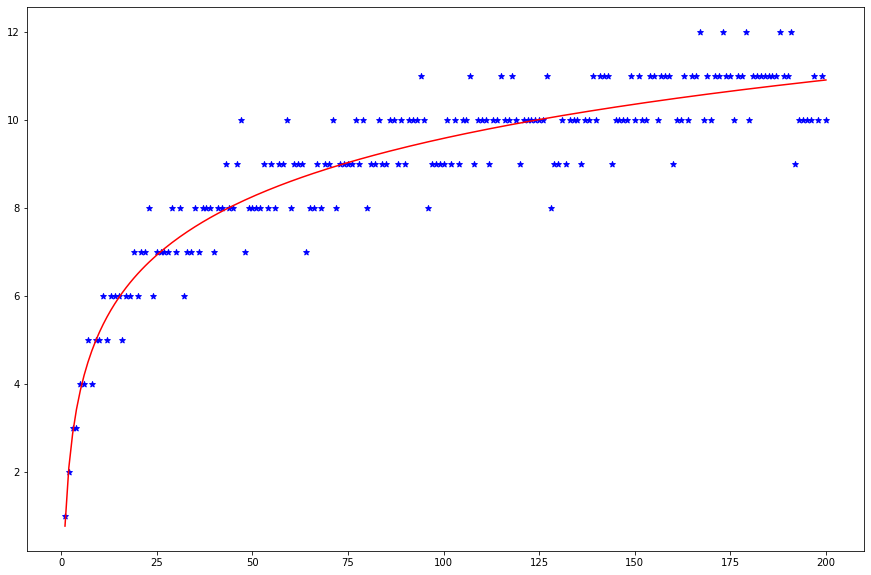

In [11]:
import pylab as plt

def approximating_curve(x, y):
    m = matrix([[sum([float((log(i))**2) for i in x]), sum([float(log(i)) for i in x])], [sum([float(log(i)) for i in x]), len(x)]])
    vec = vector([sum([float(y[i] * log(x[i])) for i in range(len(x))]), sum(y)])
    solution = m.solve_right(vec)
    plt.plot(x, [solution[0] * log(i) + solution[1] for i in x], color='r')

n = []
l_n = []
for i in range(1,201):
    n.append(i)
    l_n.append(len(splitting_index_vector(i))) 
plt.figure(figsize=(15, 10))
plt.scatter(n, l_n, color='b', marker='*')
approximating_curve(ns, lens)

**Вывод:**

*На основе графика можно сделать вывод, что функция $l(n),\, n=1..200$ аппроксимируется логарифмической кривой. Это подтверждает следствие 1 теоремы Брауэра: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$, то есть $l(n)$ и $\lambda(n)$ эквивалентны на бесконечности. С увеличением $n$ длина минимальной аддитивной цепочки $l(n)$ будет увеличиваться как логарифмическая функция.*

**Проверка гипотезы Шольца–Брауэра.**

Гипотеза Шольца–Брауэра проверена для 1<n⩽10 на алгоритме дробления вектора индексов:

In [14]:
def iter_or_dec_index_vector(index_vector, start_index, is_fix):
    max_index = start_index + len(index_vector) - 1
    for i in range(1, len(index_vector) + 1):
        index_vector[-i] -= 1
        if index_vector[-i] == 0:
            if i == len(index_vector):
                if (is_fix):
                    index_vector.pop()
                    for j in range(len(index_vector)):
                        index_vector[j] = j + start_index
                break
            index_vector[-i] = max_index
            max_index -= 1
        else:
            break

def create_chain_from_vector(r_fix, r_change):
    additive_chain = [1]
    for index in r_fix:
        additive_chain.append(additive_chain[-1] + additive_chain[index - 1])
    for index in r_change:
        additive_chain.append(additive_chain[-1] + additive_chain[index - 1])
    return additive_chain

def splitting_index_vector(n):
    m = int(math.log2(n))
    if (m == math.log2(n)):
        m -= 1
    up_bound = int(math.log2(n)) + bin(n).count('1') - 1
    
    while (m <= up_bound):
        q = m // 2
        if (q == 0):
            q = 1
        r_fix = [i for i in range(1, q + 1)]
        while (len(r_fix) == q):
            r_change = [q + i for i in range(1, (m - q + 1))]
            additive_chain = create_chain_from_vector(r_fix, r_change)
            a_max = additive_chain[q] * (2**(m - q))
            a_min = additive_chain[q] + m - q
            if (n == additive_chain[-1]):
                return additive_chain
            if (n >= a_min) and (n <= a_max):
                if (n == a_max):
                    return create_chain_from_vector(r_fix, r_change)
                if (n == a_min):
                    r_change = [1 for i in range((m - q))]
                    return create_chain_from_vector(r_fix, r_change)
                while (r_change[0] != 0):
                    additive_chain = create_chain_from_vector(r_fix, r_change)
                    if (additive_chain[-1] == n):
                        return additive_chain
                    iter_or_dec_index_vector(r_change, q + 1, False)
            iter_or_dec_index_vector(r_fix, 1, True)
        m += 1
        
for n in range(2, 11):
    l_1 = len(splitting_index_vector((2**n) -  1))
    l_2 = len(splitting_index_vector(n)) + n - 1
    print("n = %d: %d <= %d" % (n, l_1, l_2))

n = 2: 3 <= 3
n = 3: 5 <= 5
n = 4: 6 <= 6
n = 5: 8 <= 8
n = 6: 9 <= 9
n = 7: 11 <= 11
n = 8: 11 <= 11
n = 9: 13 <= 13
n = 10: 14 <= 14


*Данные для провекри гипотезы Шольца-Брауэра:*

|n|$l^*(2n−1)$|$l^*(n)+n−1$|
|:-:|:-:|:-:|
|2|3|3|
|3|5|5|
|4|6|6|
|5|8|8|
|6|9|9|
|7|11|11|
|8|11|11|
|9|13|13|
|10|14|14|

**Вывод:**

*На основе таблицы можно сделать вывод, что для $1 < n \leq 10$ гипотеза Шольца-Брауэра справедлива.*

## Выводы
В ходе выполнения практической работы:
1. были сформированы представления о аддитивных цепочках;
2. были изучены и реализованы с использованием систем компьютерной алгебры алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа:
    - бинарный метод
    - метод множителей
    - алгоритм Брауэра
    - алгоритм дробления вектора индексов
3. было проверено следствие 1 теоремы Брауэра: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$;
4. была проверена гипотеза Шольца-Брауэра: $l^*(2^n-1)\leqslant l^*(n)+n-1$ для $1 < n \leq 10$.

Было выяснено, что при увеличении  k  в алгоритме Брауэра длина аддитивной цепочки увеличивается, следовательно увеличивается и расхождение с минимальной длиной аддитивной цепочки. Алгоритм дробления вектора индексов даёт аддитивную цепочку минимальной длины, но при этом вычисления занимают много времени. При степенях $n = 2^k-1, k \in N$ метод множителей оказывается эффеткивнее бинарного метода. При степенях $n = 2^k+1, k = 5,6,...$ бинарный метод оказывается эффективнее. В остальных случаях оба метода выполняются за одно и то же число операций или метод множителей выполняется быстрее, но не значительно.